# Neural network to Student dropout rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer



In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')

In [3]:
bool_like_cols = ['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

In [4]:
X = df.drop("Target", axis=1)

# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:

# X = df.drop("Target", axis=1)
# # Create the encoder.
# encoder = OneHotEncoder(handle_unknown="ignore")
# # Assume for simplicity all features are categorical.
# encoder.fit(X) 
# # Apply the encoder.
# X = encoder.transform(X)
# y = df["Target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Tuning eta and lambda values

In [6]:
# eta_vals = np.logspace(-5, 1, 7)
# lmbd_vals = np.logspace(-5, 1, 7)
# DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
# epochs = 100
# n_hidden_neurons = (200)

# for i, eta in enumerate(eta_vals):
#     for j, lmbd in enumerate(lmbd_vals):
#         dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='relu',
#                             alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
#         dnn.fit(X_train, y_train)
        
#         DNN_scikit[i][j] = dnn
        
#         print("Learning rate  = ", eta)
#         print("Lambda = ", lmbd)
#         print("Accuracy score on test set: ", dnn.score(X_test, y_test))
#         print()


In [7]:
# # visual representation of grid search
# # uses seaborn heatmap, could probably do this in matplotlib
# import seaborn as sns

# sns.set()

# train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
# test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

# for i in range(len(eta_vals)):
#     for j in range(len(lmbd_vals)):
#         dnn = DNN_scikit[i][j]
        
#         train_pred = dnn.predict(X_train) 
#         test_pred = dnn.predict(X_test)

#         train_accuracy[i][j] = accuracy_score(y_train, train_pred)
#         test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
# fig, ax = plt.subplots(figsize = (10, 10))
# sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="Blues")
# ax.set_title("Training Accuracy")
# ax.set_ylabel("$\eta$")
# ax.set_xlabel("$\lambda$")
# plt.savefig('../Figures/nn_train_acc_lr_lmda.png', dpi=300, bbox_inches='tight')

# plt.show()

# fig, ax = plt.subplots(figsize = (10, 10))
# sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="Blues")
# ax.set_title("Test Accuracy")
# ax.set_ylabel("$\eta$")
# ax.set_xlabel("$\lambda$")
# plt.savefig('../Figures/nn_test_acc_lr_lmda.png', dpi=300, bbox_inches='tight')
# plt.show()


In [8]:
# print(eta_vals)
# print(lmbd_vals)

# print(test_accuracy[1][5])
# print(test_accuracy[2][5])



## Displaying one neural network

In [9]:
# eta = eta_vals[2]
# lmbd = lmbd_vals[5]
eta = 1.e-3
lmbd = 1.

epochs = 100
n_hidden_neurons = [100]


dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
dnn.fit(X_train, y_train)

y_pred = dnn.predict(X_test)

/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
accuracy_score(y_pred, y_test)

0.7694915254237288

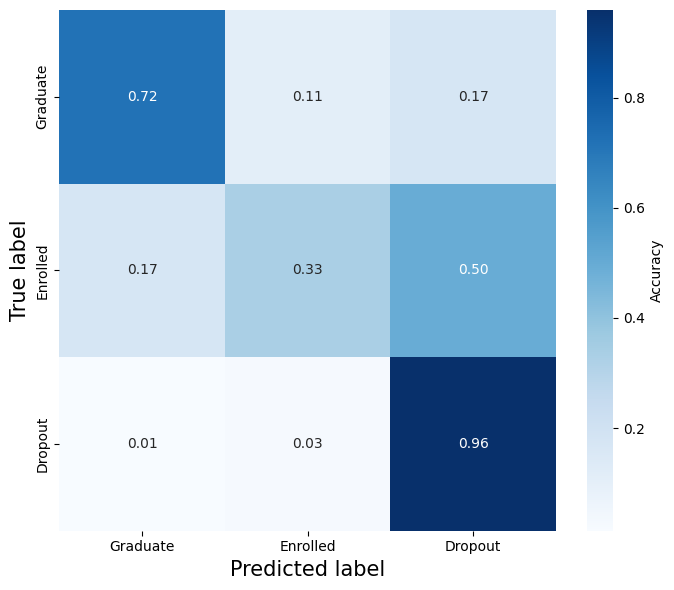

In [11]:

cm = confusion_matrix(y_test, y_pred)

target_names = ['Graduate', 'Enrolled', 'Dropout']

cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names, cbar_kws={'label':'Accuracy'})
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.tight_layout()
#plt.savefig('../Figures/Fashion_MNIST_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


## Testing different depths and number of hidden neurons

In [12]:
eta = 1.e-3
lmbd = 1.

epochs = 100
layer_no = [1,2,3]
layer_sizes = [50,100,200]

DNN_scikit = np.zeros((len(layer_no), len(layer_sizes)), dtype=object)

train_accuracy = np.zeros((len(layer_no), len(layer_sizes)))
test_accuracy = np.zeros((len(layer_no), len(layer_sizes)))


for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        n_hidden_neurons = [layer_sizes[j]] * layer_no[i]
        dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs, random_state=42)
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        print("No hidden layers  = ", layer_no[i])
        print("Hidden layer size = ", layer_sizes[j])
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()


/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  50
Accuracy score on test set:  0.7740112994350282

No hidden layers  =  1
Hidden layer size =  100
Accuracy score on test set:  0.7717514124293785

No hidden layers  =  1
Hidden layer size =  200
Accuracy score on test set:  0.7740112994350282



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  50
Accuracy score on test set:  0.751412429378531



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  100
Accuracy score on test set:  0.7661016949152543

No hidden layers  =  2
Hidden layer size =  200
Accuracy score on test set:  0.751412429378531

No hidden layers  =  3
Hidden layer size =  50
Accuracy score on test set:  0.4994350282485876

No hidden layers  =  3
Hidden layer size =  100
Accuracy score on test set:  0.4994350282485876

No hidden layers  =  3
Hidden layer size =  200
Accuracy score on test set:  0.751412429378531



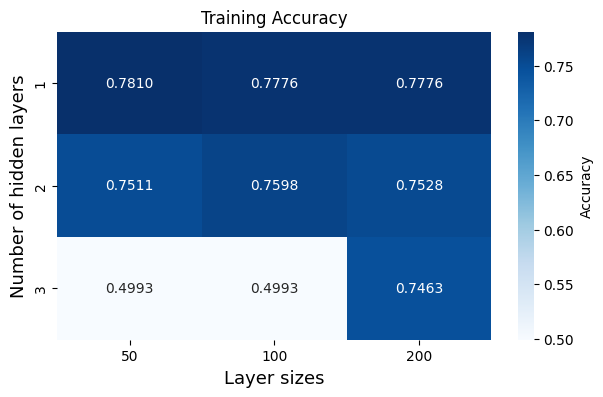

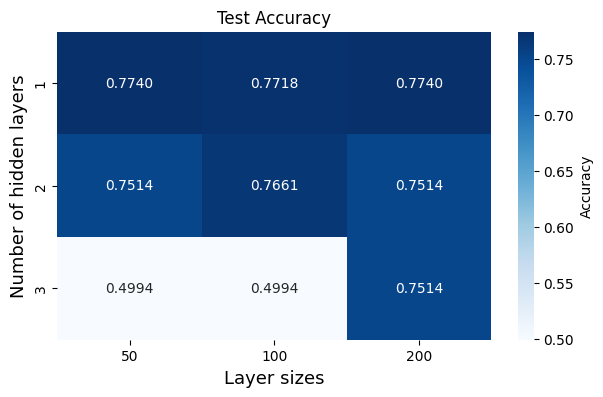

In [13]:
for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

plt.figure(figsize=(7,4))
ax = sns.heatmap( train_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Training Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
# plt.savefig('../Figures/nn_train_acc_log.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(7,4))
ax = sns.heatmap(test_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Test Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
# plt.savefig('../Figures/nn_test_acc_log.png', dpi=300, bbox_inches='tight')
plt.show()

## Testing different random states

In [14]:
eta = 1.e-3
lmbd = 1.

epochs = 100
layer_no = [1]
layer_sizes = [50,100,200,300]
random_states = [42, 52, 62, 72, 82]
DNN_scikit = np.zeros((len(random_states), len(layer_sizes)), dtype=object)

train_accuracy = np.zeros((len(random_states), len(layer_sizes)))
test_accuracy = np.zeros((len(random_states), len(layer_sizes)))




for i in range(len(random_states)):
    for j in range(len(layer_sizes)):
        n_hidden_neurons = [layer_sizes[j]] * layer_no[0]
        dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs, random_state=random_states[i])
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        print("Random state ", random_states[i])
        print("Hidden layer size = ", layer_sizes[j])
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  42
Hidden layer size =  50
Accuracy score on test set:  0.7740112994350282

Random state  42
Hidden layer size =  100
Accuracy score on test set:  0.7717514124293785

Random state  42
Hidden layer size =  200
Accuracy score on test set:  0.7740112994350282

Random state  42
Hidden layer size =  300
Accuracy score on test set:  0.7615819209039548



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  52
Hidden layer size =  50
Accuracy score on test set:  0.7717514124293785



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  52
Hidden layer size =  100
Accuracy score on test set:  0.7728813559322034

Random state  52
Hidden layer size =  200
Accuracy score on test set:  0.768361581920904



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  52
Hidden layer size =  300
Accuracy score on test set:  0.7694915254237288



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  62
Hidden layer size =  50
Accuracy score on test set:  0.7751412429378531



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  62
Hidden layer size =  100
Accuracy score on test set:  0.7740112994350282

Random state  62
Hidden layer size =  200
Accuracy score on test set:  0.768361581920904

Random state  62
Hidden layer size =  300
Accuracy score on test set:  0.7661016949152543



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  72
Hidden layer size =  50
Accuracy score on test set:  0.7751412429378531



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  72
Hidden layer size =  100
Accuracy score on test set:  0.7740112994350282

Random state  72
Hidden layer size =  200
Accuracy score on test set:  0.7740112994350282

Random state  72
Hidden layer size =  300
Accuracy score on test set:  0.7717514124293785



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  82
Hidden layer size =  50
Accuracy score on test set:  0.7785310734463277



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Random state  82
Hidden layer size =  100
Accuracy score on test set:  0.7728813559322034

Random state  82
Hidden layer size =  200
Accuracy score on test set:  0.7751412429378531

Random state  82
Hidden layer size =  300
Accuracy score on test set:  0.7638418079096045



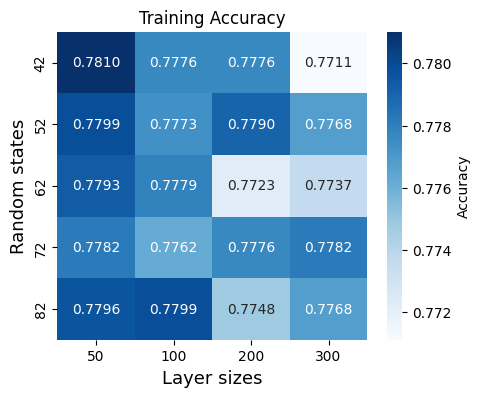

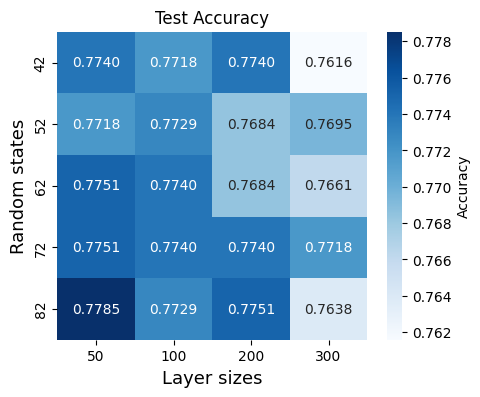

In [15]:
for i in range(len(random_states)):
    for j in range(len(layer_sizes)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

plt.figure(figsize=(5,4))
ax = sns.heatmap( train_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=random_states, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Training Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Random states", fontsize=13)
# plt.savefig('../Figures/nn_train_acc_lr_lmda.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(5,4))
ax = sns.heatmap(test_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=random_states, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Test Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Random states", fontsize=13)
# plt.savefig('../Figures/nn_test_acc_lr_lmda.png', dpi=300, bbox_inches='tight')
plt.show()

## Testing different activation functions

In [16]:
eta = 1.e-3
lmbd = 1.

epochs = 100
layer_no = [1,2,3]
layer_sizes = [50,100,200]

DNN_scikit = np.zeros((len(layer_no), len(layer_sizes)), dtype=object)

train_accuracy = np.zeros((len(layer_no), len(layer_sizes)))
test_accuracy = np.zeros((len(layer_no), len(layer_sizes)))


for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        n_hidden_neurons = [layer_sizes[j]] * layer_no[i]
        dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='relu',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs, random_state=42)
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        print("No hidden layers  = ", layer_no[i])
        print("Hidden layer size = ", layer_sizes[j])
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  50
Accuracy score on test set:  0.7672316384180791



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  100
Accuracy score on test set:  0.7706214689265537



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  200
Accuracy score on test set:  0.7638418079096045



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  50
Accuracy score on test set:  0.752542372881356



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  100
Accuracy score on test set:  0.7627118644067796



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  200
Accuracy score on test set:  0.7615819209039548



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  3
Hidden layer size =  50
Accuracy score on test set:  0.7480225988700565



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  3
Hidden layer size =  100
Accuracy score on test set:  0.7333333333333333

No hidden layers  =  3
Hidden layer size =  200
Accuracy score on test set:  0.7254237288135593



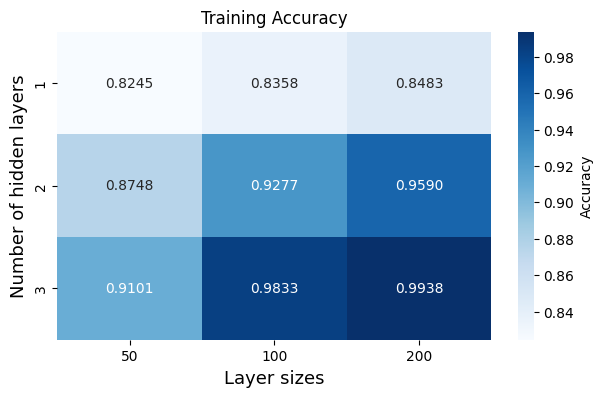

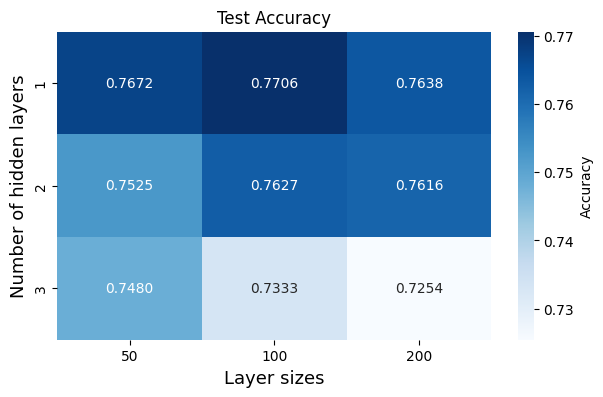

In [17]:
for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

plt.figure(figsize=(7,4))
ax = sns.heatmap( train_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Training Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
plt.savefig('../Figures/nn_train_acc_relu.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(7,4))
ax = sns.heatmap(test_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Test Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
plt.savefig('../Figures/nn_test_acc_relu.png', dpi=300, bbox_inches='tight')
plt.show()

## Testing solver

In [18]:
eta = 1.e-3
lmbd = 1.

epochs = 100
layer_no = [1,2,3]
layer_sizes = [50,100,200]

DNN_scikit = np.zeros((len(layer_no), len(layer_sizes)), dtype=object)

train_accuracy = np.zeros((len(layer_no), len(layer_sizes)))
test_accuracy = np.zeros((len(layer_no), len(layer_sizes)))


for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        n_hidden_neurons = [layer_sizes[j]] * layer_no[i]
        dnn = MLPClassifier(hidden_layer_sizes=n_hidden_neurons, activation='relu',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs, random_state=42, solver='sgd')
        dnn.fit(X_train, y_train)
        DNN_scikit[i][j] = dnn
        print("No hidden layers  = ", layer_no[i])
        print("Hidden layer size = ", layer_sizes[j])
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  50
Accuracy score on test set:  0.7615819209039548



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  100
Accuracy score on test set:  0.7615819209039548



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  1
Hidden layer size =  200
Accuracy score on test set:  0.7649717514124293



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  50
Accuracy score on test set:  0.7819209039548023



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  100
Accuracy score on test set:  0.7807909604519774



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  2
Hidden layer size =  200
Accuracy score on test set:  0.7694915254237288



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  3
Hidden layer size =  50
Accuracy score on test set:  0.7694915254237288



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No hidden layers  =  3
Hidden layer size =  100
Accuracy score on test set:  0.7751412429378531

No hidden layers  =  3
Hidden layer size =  200
Accuracy score on test set:  0.7796610169491526



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


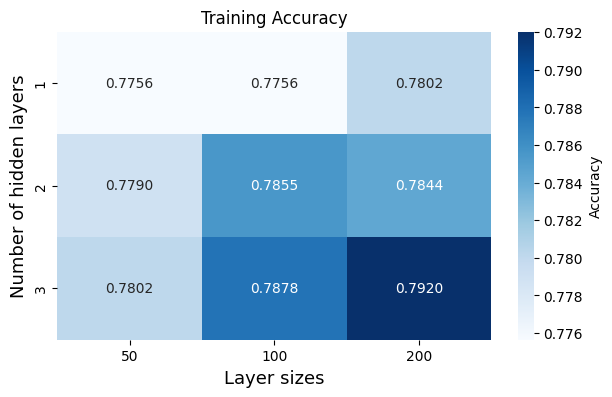

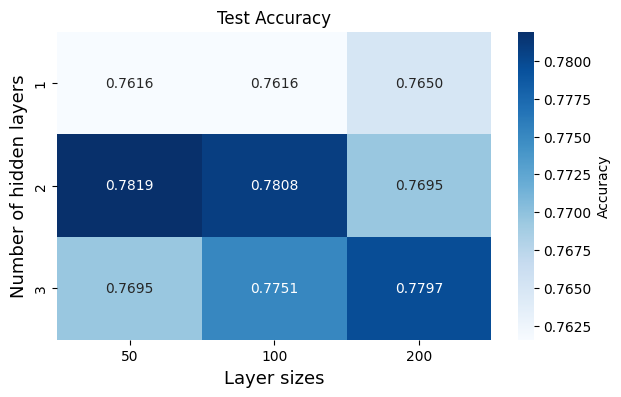

In [19]:
for i in range(len(layer_no)):
    for j in range(len(layer_sizes)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

plt.figure(figsize=(7,4))
ax = sns.heatmap( train_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Training Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
plt.savefig('../Figures/nn_train_acc_relu.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(7,4))
ax = sns.heatmap(test_accuracy, cmap='Blues', annot=True, fmt='.4f',
                 xticklabels=layer_sizes, yticklabels=layer_no, cbar=True, cbar_kws={'label':'Accuracy'} )
ax.set_title("Test Accuracy")
ax.set_xlabel("Layer sizes", fontsize=13)
ax.set_ylabel("Number of hidden layers", fontsize=13)
plt.savefig('../Figures/nn_test_acc_relu.png', dpi=300, bbox_inches='tight')
plt.show()